#### A small neural net that classifies points on a 2D plane and uses Tanh as the activation function.

Overall process:
* Generating synthetic data to simulate a binary classification task.
* Designing a simple neural network architecture suitable for binary classification. 
Here we're basically using a multiclass setup for binary classification and not threshold-based approach with only one output neuron, since two output neurons can provide a probability score for each class separately (and the class with the higher score is chosen as the model's prediction)
* Implementing a non-linear activation function (in our case, Tanh) to capture complex patterns in the data.
* Training the neural net using a cross-entropy loss function and the Adam optimizer.
* Visualizing the decision boundary to interpret the model's performance visually.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Generate synthetic data for classification
# Points will be classified based on which side of the line y=x they fall
np.random.seed(0)
# Create points in a 2D space
x = np.random.uniform(-1, 1, (200, 2))
# Labels based on a non-linear function (XOR pattern)
y = np.logical_xor(x[:, 0] > 0, x[:, 1] > 0)

In [9]:
# Convert numpy arrays to PyTorch tensors
x_tensor = torch.Tensor(x)
y_tensor = torch.Tensor(y).long() # Use long for categorical data


In [10]:
# Define a simple neural network with one hidden layer and Tanh activation
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 10)  # Two input features, 10 outputs to next layer
        self.tanh = nn.Tanh()       # Tanh activation function
        self.fc2 = nn.Linear(10, 2)  # 10 inputs from previous layer, 2 outputs for classification

    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.fc2(x)
        return x

In [11]:
# Initialize the neural network
model = SimpleNN()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [12]:
epochs = 100

for epoch in range(epochs):
        optimizer.zero_grad() # Clear gradients
        outputs = model(x_tensor) # Forward pass
        loss = criterion(outputs, y_tensor) # Calculate loss
        loss.backward() # Backward pass
        optimizer.step() # Update weights

        # Print loss every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [1/100], Loss: 0.7184
Epoch [11/100], Loss: 0.6880
Epoch [21/100], Loss: 0.6712
Epoch [31/100], Loss: 0.6434
Epoch [41/100], Loss: 0.5952
Epoch [51/100], Loss: 0.5232
Epoch [61/100], Loss: 0.4351
Epoch [71/100], Loss: 0.3499
Epoch [81/100], Loss: 0.2818
Epoch [91/100], Loss: 0.2324


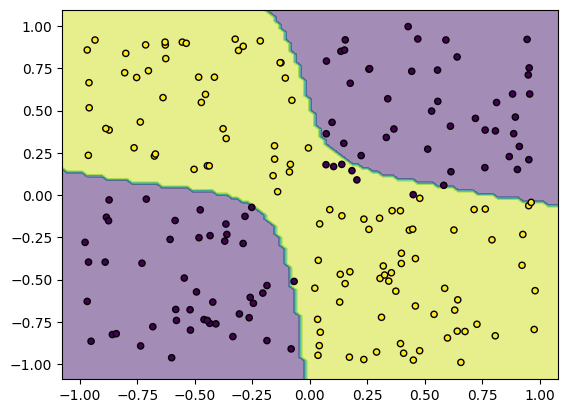

In [13]:
# Plot decision boundary
def plot_decision_boundary(model, x, y):
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict for every point in the mesh grid
    with torch.no_grad():
        z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
        z = z.argmax(axis=1).numpy().reshape(xx.shape)

    # Plot the contour and training points
    plt.contourf(xx, yy, z, alpha=0.5)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=20)
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(model, x, y) 